<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Samples-in-Python" data-toc-modified-id="Samples-in-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Samples in Python</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from tqdm import tqdm

from scipy.stats import ttest_ind, mannwhitneyu
import statsmodels.stats.api as sms

https://www.evanmiller.org/ab-testing/sample-size.html

In [2]:
mde = 0.05
baseline = 0.2
sample_size = 1030

In [3]:
np.random.binomial(1,baseline,size=sample_size).mean()


0.19514563106796118

In [4]:
np.random.binomial(1,baseline+mde,size=sample_size).mean()

0.23689320388349513

Fisher exaxt test,

Z test == Chi Square test (exactly in this case)

T test,

CHi square test, 

Bootstrap (Monte carlo)




Ho.No difference - so samples are from the same distribution

In [5]:
a=np.random.binomial(1,baseline,size=sample_size)
b=np.random.binomial(1,baseline+mde,size=sample_size)
proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])

(-1.9075332466798707, 0.056451570011201276)

In [6]:
result = []
for _ in tqdm(range(100000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:16<00:00, 6224.87it/s]


In [7]:
t = pd.Series(result)

<AxesSubplot:>

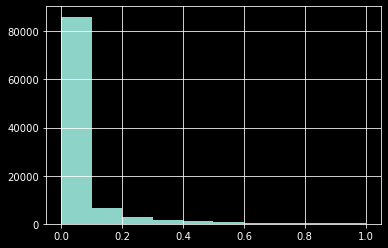

In [8]:
t.hist()

In [9]:
(t<0.05).mean() #this is power

0.77689

In [10]:
result = []
for _ in tqdm(range(10000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval =  ttest_ind(a,b,equal_var=False)
    result.append(pval)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3425.56it/s]


In [11]:
t = pd.Series(result)
(t<0.05).mean() #this is power

0.778

Mann-Whitney

In [12]:
result = []
for _ in tqdm(range(10000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = mannwhitneyu(a,b)
    result.append(pval)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2824.64it/s]


In [13]:
t = pd.Series(result)
(t<0.05).mean() #this is power

0.8594

Z-test is the statistical hypothesis used to determine whether the two samples’ means calculated are different if the standard deviation is available and the sample is large. In contrast, the T-test determines how averages of different data sets differ in case the standard deviation or the variance is unknown.


Usually, T-tests are more appropriate when dealing with problems with a limited sample size
 (i.e., n < 30).
 
 
  A Z-test will compare a sample to a defined population one typically uses for dealing with problems relating to large samples (i.e., n > 30). Mostly, they are very useful when the standard deviation is known.
  
  
  
  Z=test is based on normal distribution
  
  
  T-test is based on t-Student distribution

AA test

In [14]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = mannwhitneyu(a,b)
  result.append(pval)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2895.63it/s]


In [15]:
t = pd.Series(result)
(t<0.05).mean() #this is power

0.0924

<AxesSubplot:ylabel='Proportion'>

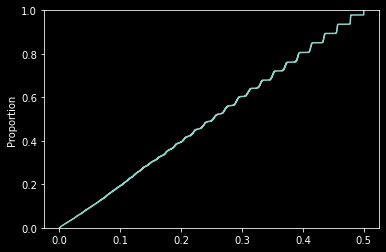

In [16]:
sns.ecdfplot(t)

Thats why we cannot use ManWitney here, because we made AA test and got big FPR 

In [17]:
(t<0.05).mean()

0.0924

In [18]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6105.56it/s]


In [19]:
t = pd.Series(result)
(t<0.05).mean() #this is power

0.0499

<AxesSubplot:ylabel='Proportion'>

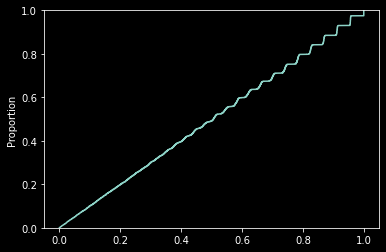

In [20]:
sns.ecdfplot(t)

In [21]:
(t<0.05).mean()

0.0499

## Samples in Python

In [22]:

es = sms.proportion_effectsize(0.20, 0.25)
sample_size = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1))

In [23]:
sample_size

1092

In [24]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6093.46it/s]


In [25]:
t = pd.Series(result)
(t<0.05).mean() #this is power

0.8055

Even Miller cannot work with diff size samples

In [26]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size1 = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1/3))

In [27]:
sample_size1

2184

In [28]:
sample_size2=round(sample_size1*1/3)

In [29]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size1)
  b = np.random.binomial(1,baseline + mde,size=sample_size2)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 5642.64it/s]


In [30]:
t = pd.Series(result)
(t<0.05).mean() #this is power

0.8045

In [31]:
sample_size = 8392
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

t = pd.Series(result)
(t < 0.05).mean()

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2449.34it/s]


0.805

In [32]:
#Lets check with math
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.3, 0.32)
sample_size = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1))

In [33]:
sample_size

8392

In [34]:
# 0.2 , 0.25 | разница была

In [35]:
sample_size = 8393
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append((1,pval))

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2337.06it/s]


In [36]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [37]:
t

,y_true,y_score
0,1,0.146810
1,1,0.085782
2,1,0.000147
3,1,0.005004
4,1,0.002546
...,...,...
995,1,0.002451
996,1,0.000008
997,1,0.056448
998,1,0.000006


In [43]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [44]:
t

,y_true,y_score,y_pred
0,1,0.146810,0
1,1,0.085782,0
2,1,0.000147,1
3,1,0.005004,1
4,1,0.002546,1
...,...,...,...
995,1,0.002451,1
996,1,0.000008,1
997,1,0.056448,0
998,1,0.000006,1


In [45]:
t['y_pred'].mean()

0.801

In [40]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [55]:
sample_size = 1090
baseline = 0.2
mde = 0.05
result = []
class_balance = 0.95
for _ in tqdm(range(10000)):
    if np.random.binomial(1,class_balance):
        a = np.random.binomial(1,baseline,size=sample_size)
        b = np.random.binomial(1,baseline,size=sample_size)
        _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])

        result.append((0,pval))
    else:
        a = np.random.binomial(1,baseline,size=sample_size)
        b = np.random.binomial(1,baseline+mde,size=sample_size)
        _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])

        result.append((1,pval))
        

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 5859.57it/s]


In [56]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [57]:
t

,y_true,y_score
0,0,0.749251
1,0,0.282555
2,0,0.876311
3,0,0.588434
4,0,0.519809
...,...,...
9995,0,0.137120
9996,0,0.914424
9997,0,0.914572
9998,0,0.790138


In [58]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [59]:
t['y_true'].mean()

0.0455

In [52]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      9545
           1       0.41      0.78      0.54       455

    accuracy                           0.94     10000
   macro avg       0.70      0.86      0.75     10000
weighted avg       0.96      0.94      0.95     10000



In [61]:
t[t['y_pred'] == 1]['y_true'].mean()

0.41327124563445866

In [62]:
t['y_pred'] = (t['y_score'] < 0.01)*1

In [63]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9545
           1       0.71      0.59      0.64       455

    accuracy                           0.97     10000
   macro avg       0.85      0.79      0.81     10000
weighted avg       0.97      0.97      0.97     10000



In [67]:
from sklearn.metrics import f1_score
f1_score(t['y_true'], t['y_pred'])

0.6425992779783394

In [74]:
from sklearn.metrics import f1_score
f1_score(t['y_true'], t['y_pred'],average= 'weighted')

0.968949467523621

In [72]:
 from sklearn.metrics import accuracy_score
accuracy_score(t['y_true'], t['y_pred'])
    
    

0.9703

In [64]:
t[t['y_pred'] == 1]['y_true'].mean()

0.7101063829787234

In [75]:
 from sklearn.metrics import precision_score

In [90]:
first=(
    t.loc[lambda x:(x['y_true']==0) & (x['y_pred']==0)].shape[0]/
 (t.loc[lambda x:(x['y_true']==0) & (x['y_pred']==0)].shape[0]+t.loc[lambda x:(x['y_true']==1) & (x['y_pred']==0)].shape[0])   
)

In [91]:
second=(
    t.loc[lambda x:(x['y_true']==1) & (x['y_pred']==1)].shape[0]/
 (t.loc[lambda x:(x['y_true']==1) & (x['y_pred']==1)].shape[0]+t.loc[lambda x:(x['y_true']==0) & (x['y_pred']==1)].shape[0])   
)

In [92]:
(first+second)/2

0.8452859429440582

In [103]:
(first*9545+second*455)/(2+9545+455)

0.96797056883878

In [106]:
w1=t.loc[lambda x:(x['y_true']==0)].shape[0]/len(t)

In [107]:
w2=t.loc[lambda x:(x['y_true']==1)].shape[0]/len(t)

In [108]:
first*w1+second*w2

0.9681641629525477

In [84]:

(t.loc[lambda x:(x['y_true']==0) & (x['y_pred']==0)].shape[0]+t.loc[lambda x:(x['y_true']==1) & (x['y_pred']==0)].shape[0])

9624

In [77]:
precision_score(t['y_pred'],t['y_true'])

0.5868131868131868

In [76]:
precision_score(t['y_true'], t['y_pred'])

0.7101063829787234

https://vkteam.medium.com/practitioners-guide-to-statistical-tests-ed2d580ef04f